In [0]:
import random
import os
import zipfile
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from shutil import copyfile

In [2]:
#Mount GDrive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
BASE_SOURCE_DIR = "/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/dataset/"
BASE_SOURCE_DIR_IMAGES = BASE_SOURCE_DIR+"/Images/Training/"
BASE_SOURCE_DIR_IMAGES_VAL = BASE_SOURCE_DIR+"/Images/Validation/"

# try:
#   os.mkdir(BASE_SOURCE_DIR+"Images")
#   os.mkdir(BASE_SOURCE_DIR_IMAGES)
#   os.mkdir(BASE_SOURCE_DIR_IMAGES_VAL)
# except:
#   pass

food = ['apple_pie', 'baklava', 'beignets', 'bread_pudding', 'carrot_cake', 'cheesecake', 'chocolate_cake', 'chocolate_mousse', 'churros',
        'creme_brulee', 'cup_cakes', 'donuts', 'frozen_yogurt', 'hummus', 'ice_cream', 'macarons', 'pancakes', 'panna_cotta', 'red_velvet_cake',
        'strawberry_shortcake', 'tiramisu', 'waffles']

# for food in food:
#     try:
#       os.mkdir(BASE_SOURCE_DIR_IMAGES+food)
#       os.mkdir(BASE_SOURCE_DIR_IMAGES_VAL+food)
#     except:
#       continue

In [0]:
# SOURCE_DIR_ARR = [os.path.join(BASE_SOURCE_DIR, food) for food in food]

# TRAINING_DIR_ARR = [os.path.join(BASE_SOURCE_DIR_IMAGES, food) for food in food]
                    
# TESTING_DIR_ARR = [os.path.join(BASE_SOURCE_DIR_IMAGES_VAL,food) for food in food]

# #MARK - Dividing data method
# #============================================================================================================
# #External Params:
# #Source     : String = Direktori untuk masing" kelas source, digunakan sebagai tempat foto sebelum di split.
# #TRAINING   : String = Direktori akhir TRAINING untuk masing" kelas.
# #VALIDATION : String = DIrektori AKHIR Testing untuk masing" Kelas.
# #SPLIT_SIZE : Double = Menentukan persentase pembagian data source ke 2 directory di atas.
# #============================================================================================================
# def divide_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    
#     #Creating Limiter
#     random.sample(SOURCE, len(SOURCE))
#     SIZE = len(os.listdir(SOURCE))
#     SPLIT_BOUNDARIES = SIZE * SPLIT_SIZE
#     SPLIT_BOUNDARIES = round(SPLIT_BOUNDARIES)
    
#     #Copy the divided source files to the training directory
#     src_training_files = os.listdir(SOURCE)[:SPLIT_BOUNDARIES]
#     for training_file in src_training_files:
#         full_training_file = os.path.join(SOURCE,training_file)
#         if os.path.isfile(full_training_file):
#             if os.path.getsize(full_training_file)!=0:
#                 destination_dir = shutil.copy(full_training_file,TRAINING)
#                 image = Image.open(destination_dir)
#                 new_image = image.resize((300, 300))
#                 new_image.save(destination_dir)
               
                
#     #Copy the divided source files to the training directory           
#     src_testing = os.listdir(SOURCE)[SPLIT_BOUNDARIES:] 
#     for testing_file in src_testing:
#         full_testing_file = os.path.join(SOURCE,testing_file)
#         if os.path.isfile(full_testing_file):
#             if os.path.getsize(full_testing_file)!=0:
#                 destination_dir = shutil.copy(full_testing_file,VALIDATION)
#                 image = Image.open(destination_dir)
#                 new_image = image.resize((300, 300))
#                 new_image.save(destination_dir)

# CLASS_SIZE = len(SOURCE_DIR_ARR)
# SPLIT_SIZE = .8

# for index in range(CLASS_SIZE):
#     divide_data(SOURCE_DIR_ARR[index], TRAINING_DIR_ARR[index], TESTING_DIR_ARR[index],SPLIT_SIZE)

# print(len(os.listdir(SOURCE_DIR_ARR[0])))
# print(len(os.listdir(TRAINING_DIR_ARR[0])))
# print(len(os.listdir(TESTING_DIR_ARR[0])))


# 1: Inception 1: Training (53.8), Validation (62.5) - Underfit, need more epoch and less regularization -> Fixed in Inception 2

In [0]:
#source: https://www.kaggle.com/etugoluk/food-classification-inceptionnet with modifications
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

target_size = 300

incnet = InceptionV3(weights='imagenet', include_top=False, input_tensor=layers.Input(shape=(target_size, target_size, 3)))
incnet.trainable = False
x = incnet.output
x = layers.AveragePooling2D(pool_size=(8, 8))(x)
x = layers.Dropout(.2)(x)
x = layers.Flatten()(x)
output = layers.Dense(22, activation='softmax', kernel_regularizer=regularizers.l2(.0005))(x)
nel_regularizer=regularizers.l2(.0005)(x)

model = models.Model(inputs=incnet.input, outputs=output)
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                   rotation_range = 40,
                   width_shift_range = 0.2,
                   height_shift_range = 0.2,
                   shear_range = 0.2,
                   zoom_range = 0.2,
                   horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
                  BASE_SOURCE_DIR_IMAGES,  
                  target_size=(target_size, target_size),  
                  batch_size=800,
                  class_mode='categorical'
                 )

validation_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = validation_datagen.flow_from_directory(
                      BASE_SOURCE_DIR_IMAGES_VAL,  
                      target_size=(target_size, target_size), 
                      batch_size=200,
                      class_mode='categorical'
                     )

Found 17600 images belonging to 22 classes.
Found 4400 images belonging to 22 classes.


In [0]:
history = model.fit(train_generator,
                     epochs=5,
                     verbose=1,
                     validation_data=validation_generator)

Epoch 1/5
22/22 [==============================] - 2593s 118s/step - loss: 2.5971 - accuracy: 0.2685 - val_loss: 2.0806 - val_accuracy: 0.4966
Epoch 2/5
22/22 [==============================] - 429s 20s/step - loss: 2.0814 - accuracy: 0.4389 - val_loss: 1.7136 - val_accuracy: 0.5566
Epoch 3/5
22/22 [==============================] - 429s 19s/step - loss: 1.8352 - accuracy: 0.4939 - val_loss: 1.5212 - val_accuracy: 0.5882
Epoch 4/5
22/22 [==============================] - 430s 20s/step - loss: 1.7043 - accuracy: 0.5181 - val_loss: 1.4097 - val_accuracy: 0.6159
Epoch 5/5
22/22 [==============================] - 427s 19s/step - loss: 1.6218 - accuracy: 0.5377 - val_loss: 1.3511 - val_accuracy: 0.6245


Text(0.5, 1.0, 'Training and validation loss')

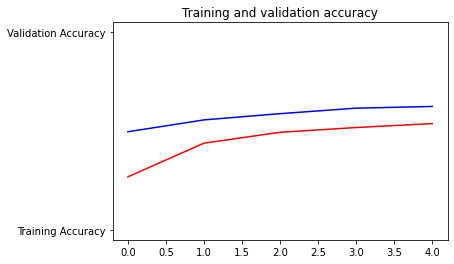

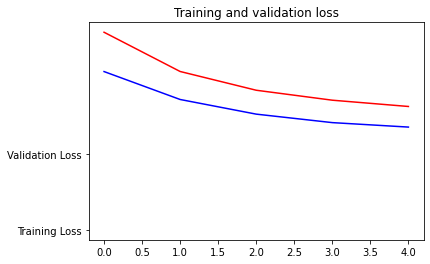

In [0]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [0]:
model.save("/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_01.h5")

# 2: Inception 2: Training (), Validation ()

In [0]:
#Inception 1 but target_size=299, epoch=10, without regularization

target_size = 299

incnet = InceptionV3(weights='imagenet', include_top=False, input_tensor=layers.Input(shape=(target_size, target_size, 3)))
incnet.trainable = False
x = incnet.output
x = layers.AveragePooling2D(pool_size=(8, 8))(x)
x = layers.Flatten()(x)
output = layers.Dense(22, activation='softmax')(x)

model = models.Model(inputs=incnet.input, outputs=output)
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [0]:
target_size = 299
train_datagen = ImageDataGenerator(rescale=1./255,
                   rotation_range = 40,
                   width_shift_range = 0.2,
                   height_shift_range = 0.2,
                   shear_range = 0.2,
                   zoom_range = 0.2,
                   horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
                  BASE_SOURCE_DIR_IMAGES,  
                  target_size=(target_size, target_size),  
                  batch_size=800,
                  class_mode='categorical'
                 )

validation_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = validation_datagen.flow_from_directory(
                      BASE_SOURCE_DIR_IMAGES_VAL,  
                      target_size=(target_size, target_size), 
                      batch_size=200,
                      class_mode='categorical'
                     )

NameError: ignored

In [0]:
history = model.fit(train_generator,
                     epochs=10,
                     verbose=1,
                     validation_data=validation_generator)

Epoch 1/10
22/22 [==============================] - 419s 19s/step - loss: 2.6080 - accuracy: 0.2778 - val_loss: 1.9941 - val_accuracy: 0.4884
Epoch 2/10
22/22 [==============================] - 413s 19s/step - loss: 1.9088 - accuracy: 0.4853 - val_loss: 1.5504 - val_accuracy: 0.5714
Epoch 3/10
22/22 [==============================] - 414s 19s/step - loss: 1.6556 - accuracy: 0.5337 - val_loss: 1.3774 - val_accuracy: 0.6182
Epoch 4/10
22/22 [==============================] - 411s 19s/step - loss: 1.5487 - accuracy: 0.5531 - val_loss: 1.3117 - val_accuracy: 0.6302
Epoch 5/10
22/22 [==============================] - 416s 19s/step - loss: 1.4669 - accuracy: 0.5744 - val_loss: 1.2381 - val_accuracy: 0.6466
Epoch 6/10
22/22 [==============================] - 417s 19s/step - loss: 1.4219 - accuracy: 0.5868 - val_loss: 1.2069 - val_accuracy: 0.6464
Epoch 7/10
22/22 [==============================] - 418s 19s/step - loss: 1.3864 - accuracy: 0.5909 - val_loss: 1.1683 - val_accuracy: 0.6605
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

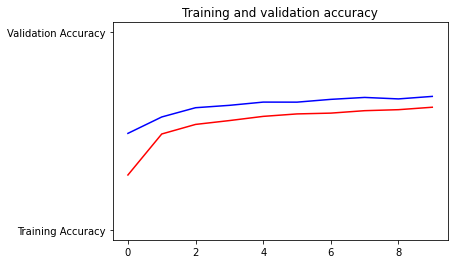

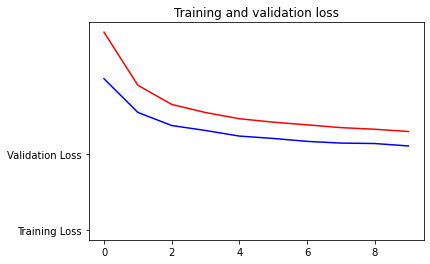

In [0]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [0]:
model.save("/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_02.h5")

In [0]:
#continue training
model = tf.keras.models.load_model('/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_02.h5')

In [0]:
history = model.fit(train_generator,
                     epochs=10,
                     verbose=1,
                     validation_data=validation_generator)

Epoch 1/10
22/22 [==============================] - 413s 19s/step - loss: 1.2740 - accuracy: 0.6212 - val_loss: 1.0958 - val_accuracy: 0.6791
Epoch 2/10
22/22 [==============================] - 400s 18s/step - loss: 1.2650 - accuracy: 0.6265 - val_loss: 1.0833 - val_accuracy: 0.6816
Epoch 3/10
22/22 [==============================] - 397s 18s/step - loss: 1.2505 - accuracy: 0.6269 - val_loss: 1.0763 - val_accuracy: 0.6832
Epoch 4/10
22/22 [==============================] - 396s 18s/step - loss: 1.2305 - accuracy: 0.6328 - val_loss: 1.0618 - val_accuracy: 0.6884
Epoch 5/10
22/22 [==============================] - 393s 18s/step - loss: 1.2173 - accuracy: 0.6403 - val_loss: 1.0602 - val_accuracy: 0.6807
Epoch 6/10
22/22 [==============================] - 391s 18s/step - loss: 1.2129 - accuracy: 0.6376 - val_loss: 1.0580 - val_accuracy: 0.6891
Epoch 7/10
22/22 [==============================] - 390s 18s/step - loss: 1.1968 - accuracy: 0.6425 - val_loss: 1.0416 - val_accuracy: 0.6902
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

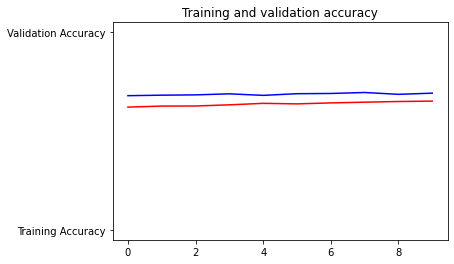

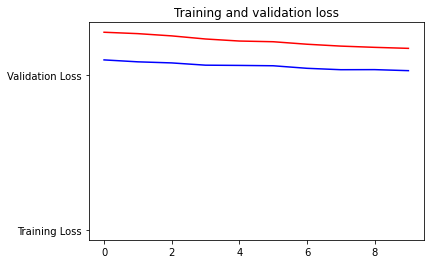

In [0]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [0]:
model.save("/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_02-2.h5")

In [0]:
history = model.fit(train_generator,
                     epochs=10,
                     verbose=1,
                     validation_data=validation_generator)

Epoch 1/10
22/22 [==============================] - 400s 18s/step - loss: 1.1596 - accuracy: 0.6531 - val_loss: 1.0220 - val_accuracy: 0.6936
Epoch 2/10
22/22 [==============================] - 405s 18s/step - loss: 1.1499 - accuracy: 0.6561 - val_loss: 1.0135 - val_accuracy: 0.6982
Epoch 3/10
22/22 [==============================] - 408s 19s/step - loss: 1.1505 - accuracy: 0.6556 - val_loss: 1.0088 - val_accuracy: 0.7020
Epoch 4/10
22/22 [==============================] - 407s 18s/step - loss: 1.1424 - accuracy: 0.6567 - val_loss: 1.0067 - val_accuracy: 0.6989
Epoch 5/10
22/22 [==============================] - 407s 19s/step - loss: 1.1268 - accuracy: 0.6616 - val_loss: 1.0061 - val_accuracy: 0.6998
Epoch 6/10
22/22 [==============================] - 408s 19s/step - loss: 1.1291 - accuracy: 0.6639 - val_loss: 1.0007 - val_accuracy: 0.6998
Epoch 7/10
22/22 [==============================] - 406s 18s/step - loss: 1.1124 - accuracy: 0.6673 - val_loss: 0.9947 - val_accuracy: 0.6998
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

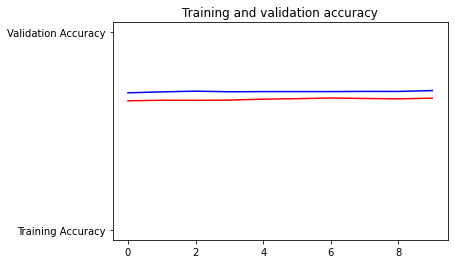

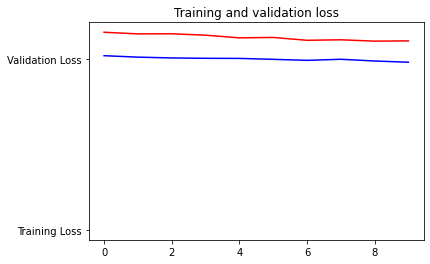

In [0]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [0]:
model.save("/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_02-3.h5")

In [0]:
#continue training
model = tf.keras.models.load_model('/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_02-3.h5')
target_size = 299
train_datagen = ImageDataGenerator(rescale=1./255,
                   rotation_range = 40,
                   width_shift_range = 0.2,
                   height_shift_range = 0.2,
                   shear_range = 0.2,
                   zoom_range = 0.2,
                   horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
                  BASE_SOURCE_DIR_IMAGES,  
                  target_size=(target_size, target_size),  
                  batch_size=800,
                  class_mode='categorical'
                 )

validation_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = validation_datagen.flow_from_directory(
                      BASE_SOURCE_DIR_IMAGES_VAL,  
                      target_size=(target_size, target_size), 
                      batch_size=200,
                      class_mode='categorical'
                     )

Found 17600 images belonging to 22 classes.
Found 4400 images belonging to 22 classes.


In [0]:
history = model.fit(train_generator,
                     epochs=10,
                     verbose=1,
                     validation_data=validation_generator)

Epoch 1/10
22/22 [==============================] - 2976s 135s/step - loss: 1.1037 - accuracy: 0.6697 - val_loss: 0.9895 - val_accuracy: 0.7005
Epoch 2/10
22/22 [==============================] - 372s 17s/step - loss: 1.0849 - accuracy: 0.6747 - val_loss: 0.9781 - val_accuracy: 0.7107
Epoch 3/10
22/22 [==============================] - 380s 17s/step - loss: 1.0862 - accuracy: 0.6695 - val_loss: 0.9778 - val_accuracy: 0.7080
Epoch 4/10
22/22 [==============================] - 375s 17s/step - loss: 1.0802 - accuracy: 0.6720 - val_loss: 0.9763 - val_accuracy: 0.7077
Epoch 5/10
22/22 [==============================] - 379s 17s/step - loss: 1.0805 - accuracy: 0.6737 - val_loss: 0.9725 - val_accuracy: 0.7089
Epoch 6/10
22/22 [==============================] - 380s 17s/step - loss: 1.0727 - accuracy: 0.6764 - val_loss: 0.9671 - val_accuracy: 0.7139
Epoch 7/10
22/22 [==============================] - 381s 17s/step - loss: 1.0714 - accuracy: 0.6782 - val_loss: 0.9692 - val_accuracy: 0.7082
Epoc

Text(0.5, 1.0, 'Training and validation loss')

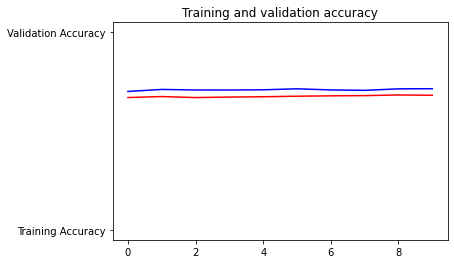

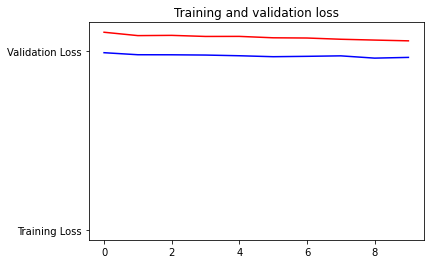

In [0]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [0]:
model.save("/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_02-4.h5")

In [0]:
#continue training

In [0]:
history = model.fit(train_generator,
                     epochs=10,
                     verbose=1,
                     validation_data=validation_generator)

Epoch 1/10
22/22 [==============================] - 368s 17s/step - loss: 1.0539 - accuracy: 0.6791 - val_loss: 0.9591 - val_accuracy: 0.7114
Epoch 2/10
22/22 [==============================] - 362s 16s/step - loss: 1.0545 - accuracy: 0.6849 - val_loss: 0.9605 - val_accuracy: 0.7125
Epoch 3/10
22/22 [==============================] - 366s 17s/step - loss: 1.0496 - accuracy: 0.6791 - val_loss: 0.9585 - val_accuracy: 0.7136
Epoch 4/10
22/22 [==============================] - 364s 17s/step - loss: 1.0447 - accuracy: 0.6817 - val_loss: 0.9522 - val_accuracy: 0.7120
Epoch 5/10
22/22 [==============================] - 363s 16s/step - loss: 1.0418 - accuracy: 0.6873 - val_loss: 0.9515 - val_accuracy: 0.7132
Epoch 6/10
22/22 [==============================] - 361s 16s/step - loss: 1.0399 - accuracy: 0.6863 - val_loss: 0.9542 - val_accuracy: 0.7130
Epoch 7/10
22/22 [==============================] - 366s 17s/step - loss: 1.0382 - accuracy: 0.6852 - val_loss: 0.9440 - val_accuracy: 0.7145
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

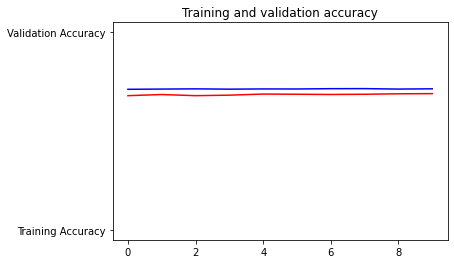

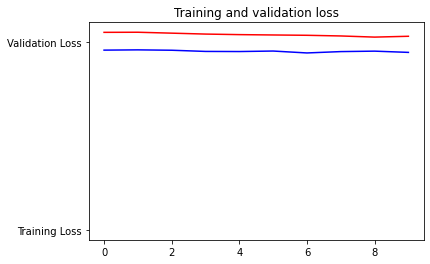

In [0]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [0]:
model.save("/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_02-5.h5")

In [0]:
#continue training

In [0]:
history = model.fit(train_generator,
                     epochs=10,
                     verbose=1,
                     validation_data=validation_generator)

Epoch 1/10
22/22 [==============================] - 362s 16s/step - loss: 1.0245 - accuracy: 0.6919 - val_loss: 0.9399 - val_accuracy: 0.7152
Epoch 2/10
22/22 [==============================] - 366s 17s/step - loss: 1.0206 - accuracy: 0.6910 - val_loss: 0.9566 - val_accuracy: 0.7111
Epoch 3/10
22/22 [==============================] - 370s 17s/step - loss: 1.0100 - accuracy: 0.6927 - val_loss: 0.9509 - val_accuracy: 0.7130
Epoch 4/10
22/22 [==============================] - 371s 17s/step - loss: 1.0155 - accuracy: 0.6905 - val_loss: 0.9502 - val_accuracy: 0.7120
Epoch 5/10
22/22 [==============================] - 369s 17s/step - loss: 1.0176 - accuracy: 0.6895 - val_loss: 0.9429 - val_accuracy: 0.7145
Epoch 6/10
22/22 [==============================] - 370s 17s/step - loss: 1.0079 - accuracy: 0.6916 - val_loss: 0.9374 - val_accuracy: 0.7182
Epoch 7/10
22/22 [==============================] - 369s 17s/step - loss: 0.9986 - accuracy: 0.6974 - val_loss: 0.9451 - val_accuracy: 0.7159
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

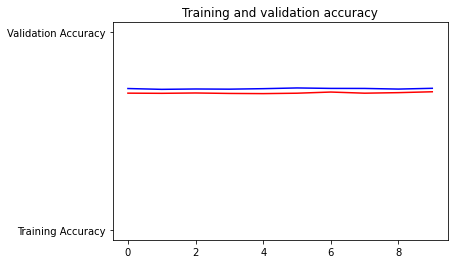

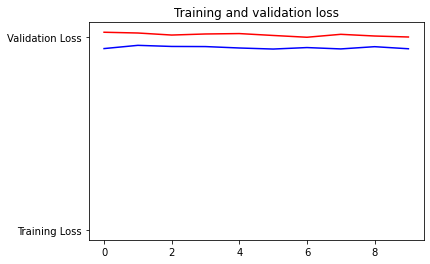

In [0]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [0]:
model.save("/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_02-6.h5")

In [0]:
history = model.fit(train_generator,
                     epochs=10,
                     verbose=1,
                     validation_data=validation_generator)

Epoch 1/10
22/22 [==============================] - 357s 16s/step - loss: 0.9956 - accuracy: 0.6991 - val_loss: 0.9414 - val_accuracy: 0.7193
Epoch 2/10
22/22 [==============================] - 372s 17s/step - loss: 1.0058 - accuracy: 0.6939 - val_loss: 0.9371 - val_accuracy: 0.7202
Epoch 3/10
22/22 [==============================] - 370s 17s/step - loss: 0.9944 - accuracy: 0.6987 - val_loss: 0.9349 - val_accuracy: 0.7159
Epoch 4/10
22/22 [==============================] - 371s 17s/step - loss: 0.9929 - accuracy: 0.6999 - val_loss: 0.9373 - val_accuracy: 0.7195
Epoch 5/10
22/22 [==============================] - 360s 16s/step - loss: 0.9821 - accuracy: 0.7011 - val_loss: 0.9304 - val_accuracy: 0.7198
Epoch 6/10
22/22 [==============================] - 355s 16s/step - loss: 0.9835 - accuracy: 0.7033 - val_loss: 0.9312 - val_accuracy: 0.7202
Epoch 7/10
22/22 [==============================] - 352s 16s/step - loss: 0.9821 - accuracy: 0.7053 - val_loss: 0.9310 - val_accuracy: 0.7170
Epoch 

In [0]:
model.save("/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_02-7.h5")

In [0]:
history = model.fit(train_generator,
                     epochs=10,
                     verbose=1,
                     validation_data=validation_generator)

Epoch 1/10
22/22 [==============================] - 370s 17s/step - loss: 0.9683 - accuracy: 0.7066 - val_loss: 0.9293 - val_accuracy: 0.7198
Epoch 2/10
22/22 [==============================] - 371s 17s/step - loss: 0.9767 - accuracy: 0.7041 - val_loss: 0.9258 - val_accuracy: 0.7209
Epoch 3/10
22/22 [==============================] - 365s 17s/step - loss: 0.9788 - accuracy: 0.7030 - val_loss: 0.9293 - val_accuracy: 0.7170
Epoch 4/10
22/22 [==============================] - 357s 16s/step - loss: 0.9702 - accuracy: 0.7074 - val_loss: 0.9325 - val_accuracy: 0.7193
Epoch 5/10
22/22 [==============================] - 359s 16s/step - loss: 0.9680 - accuracy: 0.7062 - val_loss: 0.9236 - val_accuracy: 0.7218
Epoch 6/10
22/22 [==============================] - 359s 16s/step - loss: 0.9636 - accuracy: 0.7084 - val_loss: 0.9245 - val_accuracy: 0.7202
Epoch 7/10
22/22 [==============================] - 361s 16s/step - loss: 0.9673 - accuracy: 0.7028 - val_loss: 0.9260 - val_accuracy: 0.7218
Epoch 

In [0]:
model.save("/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_02-8.h5")

In [0]:
history = model.fit(train_generator,
                     epochs=10,
                     verbose=1,
                     validation_data=validation_generator)

Epoch 1/10
22/22 [==============================] - 349s 16s/step - loss: 0.9538 - accuracy: 0.7073 - val_loss: 0.9238 - val_accuracy: 0.7205
Epoch 2/10
22/22 [==============================] - 354s 16s/step - loss: 0.9513 - accuracy: 0.7086 - val_loss: 0.9194 - val_accuracy: 0.7216
Epoch 3/10
22/22 [==============================] - 354s 16s/step - loss: 0.9537 - accuracy: 0.7085 - val_loss: 0.9279 - val_accuracy: 0.7207
Epoch 4/10
22/22 [==============================] - 360s 16s/step - loss: 0.9504 - accuracy: 0.7102 - val_loss: 0.9192 - val_accuracy: 0.7230
Epoch 5/10
22/22 [==============================] - 358s 16s/step - loss: 0.9575 - accuracy: 0.7101 - val_loss: 0.9269 - val_accuracy: 0.7211
Epoch 6/10
22/22 [==============================] - 357s 16s/step - loss: 0.9502 - accuracy: 0.7069 - val_loss: 0.9266 - val_accuracy: 0.7236
Epoch 7/10
22/22 [==============================] - 360s 16s/step - loss: 0.9449 - accuracy: 0.7148 - val_loss: 0.9207 - val_accuracy: 0.7209
Epoch 

In [0]:
model.save("/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_02-9.h5")

In [5]:
model = tf.keras.models.load_model('/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_02-9.h5')

target_size = 299
train_datagen = ImageDataGenerator(rescale=1./255,
                   rotation_range = 40,
                   width_shift_range = 0.2,
                   height_shift_range = 0.2,
                   shear_range = 0.2,
                   zoom_range = 0.2,
                   horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
                  BASE_SOURCE_DIR_IMAGES,  
                  target_size=(target_size, target_size),  
                  batch_size=400,
                  class_mode='categorical'
                 )

validation_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = validation_datagen.flow_from_directory(
                      BASE_SOURCE_DIR_IMAGES_VAL,  
                      target_size=(target_size, target_size), 
                      batch_size=100,
                      class_mode='categorical'
                     )
history = model.fit(train_generator,
                     epochs=10,
                     verbose=1,
                     validation_data=validation_generator)

Found 17600 images belonging to 22 classes.
Found 4400 images belonging to 22 classes.
Epoch 1/10
44/44 [==============================] - 3220s 73s/step - loss: 0.9551 - accuracy: 0.7080 - val_loss: 0.9260 - val_accuracy: 0.7250
Epoch 2/10
44/44 [==============================] - 394s 9s/step - loss: 0.9549 - accuracy: 0.7079 - val_loss: 0.9384 - val_accuracy: 0.7193
Epoch 3/10
44/44 [==============================] - 386s 9s/step - loss: 0.9556 - accuracy: 0.7049 - val_loss: 0.9247 - val_accuracy: 0.7189
Epoch 4/10
44/44 [==============================] - 379s 9s/step - loss: 0.9487 - accuracy: 0.7119 - val_loss: 0.9324 - val_accuracy: 0.7143
Epoch 5/10
44/44 [==============================] - 378s 9s/step - loss: 0.9513 - accuracy: 0.7070 - val_loss: 0.9173 - val_accuracy: 0.7234
Epoch 6/10
44/44 [==============================] - 379s 9s/step - loss: 0.9465 - accuracy: 0.7130 - val_loss: 0.9256 - val_accuracy: 0.7175
Epoch 7/10
44/44 [==============================] - 378s 9s/step 

In [0]:
model.save("/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_02-10.h5")

In [7]:
history = model.fit(train_generator,
                     epochs=10,
                     verbose=1,
                     validation_data=validation_generator)

Epoch 1/10
44/44 [==============================] - 380s 9s/step - loss: 0.9394 - accuracy: 0.7090 - val_loss: 0.9329 - val_accuracy: 0.7168
Epoch 2/10
44/44 [==============================] - 377s 9s/step - loss: 0.9391 - accuracy: 0.7137 - val_loss: 0.9241 - val_accuracy: 0.7141
Epoch 3/10
44/44 [==============================] - 372s 8s/step - loss: 0.9313 - accuracy: 0.7134 - val_loss: 0.9170 - val_accuracy: 0.7234
Epoch 4/10
44/44 [==============================] - 372s 8s/step - loss: 0.9291 - accuracy: 0.7157 - val_loss: 0.9227 - val_accuracy: 0.7195
Epoch 5/10
44/44 [==============================] - 373s 8s/step - loss: 0.9341 - accuracy: 0.7118 - val_loss: 0.9333 - val_accuracy: 0.7191
Epoch 6/10
44/44 [==============================] - 371s 8s/step - loss: 0.9203 - accuracy: 0.7189 - val_loss: 0.9313 - val_accuracy: 0.7230
Epoch 7/10
44/44 [==============================] - 376s 9s/step - loss: 0.9280 - accuracy: 0.7119 - val_loss: 0.9198 - val_accuracy: 0.7266
Epoch 8/10
44

In [0]:
model.save("/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_02-11.h5")

In [9]:
history = model.fit(train_generator,
                     epochs=10,
                     verbose=1,
                     validation_data=validation_generator)

Epoch 1/10
44/44 [==============================] - 370s 8s/step - loss: 0.9211 - accuracy: 0.7149 - val_loss: 0.9186 - val_accuracy: 0.7227
Epoch 2/10
44/44 [==============================] - 370s 8s/step - loss: 0.9198 - accuracy: 0.7135 - val_loss: 0.9091 - val_accuracy: 0.7252
Epoch 3/10
44/44 [==============================] - 369s 8s/step - loss: 0.9088 - accuracy: 0.7184 - val_loss: 0.9165 - val_accuracy: 0.7214
Epoch 4/10
44/44 [==============================] - 369s 8s/step - loss: 0.9006 - accuracy: 0.7223 - val_loss: 0.9134 - val_accuracy: 0.7200
Epoch 5/10
44/44 [==============================] - 372s 8s/step - loss: 0.9004 - accuracy: 0.7252 - val_loss: 0.9136 - val_accuracy: 0.7223
Epoch 6/10
44/44 [==============================] - 371s 8s/step - loss: 0.9018 - accuracy: 0.7199 - val_loss: 0.9153 - val_accuracy: 0.7250
Epoch 7/10
44/44 [==============================] - 372s 8s/step - loss: 0.9067 - accuracy: 0.7201 - val_loss: 0.9198 - val_accuracy: 0.7200
Epoch 8/10
44

In [0]:
model.save("/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_02-12.h5")

In [11]:
history = model.fit(train_generator,
                     epochs=10,
                     verbose=1,
                     validation_data=validation_generator)

Epoch 1/10
44/44 [==============================] - 374s 8s/step - loss: 0.9035 - accuracy: 0.7218 - val_loss: 0.9229 - val_accuracy: 0.7220
Epoch 2/10
44/44 [==============================] - 372s 8s/step - loss: 0.9074 - accuracy: 0.7195 - val_loss: 0.9073 - val_accuracy: 0.7252
Epoch 3/10
44/44 [==============================] - 377s 9s/step - loss: 0.8876 - accuracy: 0.7278 - val_loss: 0.9218 - val_accuracy: 0.7202
Epoch 4/10
44/44 [==============================] - 373s 8s/step - loss: 0.8998 - accuracy: 0.7203 - val_loss: 0.9134 - val_accuracy: 0.7270
Epoch 5/10
44/44 [==============================] - 380s 9s/step - loss: 0.8950 - accuracy: 0.7215 - val_loss: 0.9271 - val_accuracy: 0.7214
Epoch 6/10
44/44 [==============================] - 380s 9s/step - loss: 0.9003 - accuracy: 0.7215 - val_loss: 0.9136 - val_accuracy: 0.7234
Epoch 7/10
44/44 [==============================] - 376s 9s/step - loss: 0.8934 - accuracy: 0.7238 - val_loss: 0.9214 - val_accuracy: 0.7227
Epoch 8/10
44

In [0]:
model.save("/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_02-13.h5")

In [13]:
history = model.fit(train_generator,
                     epochs=10,
                     verbose=1,
                     validation_data=validation_generator)

Epoch 1/10
44/44 [==============================] - 367s 8s/step - loss: 0.8883 - accuracy: 0.7286 - val_loss: 0.9091 - val_accuracy: 0.7236
Epoch 2/10
44/44 [==============================] - 366s 8s/step - loss: 0.8889 - accuracy: 0.7259 - val_loss: 0.9133 - val_accuracy: 0.7282
Epoch 3/10
44/44 [==============================] - 366s 8s/step - loss: 0.8830 - accuracy: 0.7265 - val_loss: 0.9256 - val_accuracy: 0.7198
Epoch 4/10
44/44 [==============================] - 366s 8s/step - loss: 0.8849 - accuracy: 0.7280 - val_loss: 0.9179 - val_accuracy: 0.7214
Epoch 5/10
44/44 [==============================] - 369s 8s/step - loss: 0.8762 - accuracy: 0.7317 - val_loss: 0.9128 - val_accuracy: 0.7255
Epoch 6/10
44/44 [==============================] - 368s 8s/step - loss: 0.8749 - accuracy: 0.7302 - val_loss: 0.9137 - val_accuracy: 0.7230
Epoch 7/10
44/44 [==============================] - 369s 8s/step - loss: 0.8834 - accuracy: 0.7264 - val_loss: 0.9092 - val_accuracy: 0.7259
Epoch 8/10
44

In [0]:
model.save("/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final Project/InceptionV3_02-14.h5")

In [15]:
history = model.fit(train_generator,
                     epochs=10,
                     verbose=1,
                     validation_data=validation_generator)

Epoch 1/10
44/44 [==============================] - 371s 8s/step - loss: 0.8667 - accuracy: 0.7302 - val_loss: 0.9187 - val_accuracy: 0.7250
Epoch 2/10
44/44 [==============================] - 371s 8s/step - loss: 0.8655 - accuracy: 0.7361 - val_loss: 0.9253 - val_accuracy: 0.7248
Epoch 3/10
44/44 [==============================] - 376s 9s/step - loss: 0.8753 - accuracy: 0.7303 - val_loss: 0.9191 - val_accuracy: 0.7261
Epoch 4/10
44/44 [==============================] - 370s 8s/step - loss: 0.8657 - accuracy: 0.7342 - val_loss: 0.9228 - val_accuracy: 0.7248
Epoch 5/10
44/44 [==============================] - 369s 8s/step - loss: 0.8723 - accuracy: 0.7287 - val_loss: 0.9141 - val_accuracy: 0.7243
Epoch 6/10
44/44 [==============================] - 372s 8s/step - loss: 0.8777 - accuracy: 0.7279 - val_loss: 0.9179 - val_accuracy: 0.7243
Epoch 7/10
44/44 [==============================] - 370s 8s/step - loss: 0.8637 - accuracy: 0.7323 - val_loss: 0.9112 - val_accuracy: 0.7227
Epoch 8/10
44

In [0]:
model.save("/gdrive/My Drive/Bangkit/Hard Skill/Assignment/Final P roject/InceptionV3_02-15.h5")